## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [86]:
path = r'/Users/arturassada/Desktop/Brazilian E-Commerce'

In [87]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'data_general.csv'))

### 2. Data cleaning

In [88]:
df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'review_id', 'review_score', 'review_comment_title',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [89]:
df.head(20)

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,1.0,credit_card,2.0,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,30.0,40.0,3471,sao paulo,SP,pet_shop,1.0,credit_card,3.0,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,1.0,credit_card,5.0,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,10.0,15.0,14403,franca,SP,perfumery,1.0,credit_card,2.0,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,40.0,30.0,87900,loanda,PR,garden_tools,1.0,credit_card,3.0,218.04
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,...,8.0,15.0,14091,ribeirao preto,SP,housewares,1.0,boleto,1.0,34.59
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,...,5.0,20.0,1026,sao paulo,SP,telephony,1.0,credit_card,1.0,31.75
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,...,75.0,45.0,19010,presidente prudente,SP,garden_tools,1.0,credit_card,10.0,880.75
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,...,12.0,16.0,3702,sao paulo,SP,health_beauty,1.0,credit_card,3.0,157.60
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,...,3.0,21.0,2274,sao paulo,SP,books_technical,1.0,credit_card,1.0,65.39


In [90]:
df.shape

(115723, 35)

In [91]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

##### Missing values

In [92]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                            0
order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
review_id                           861
review_score                        861
review_comment_title             102139
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
product_category_name              1638
product_name_lenght                1638
product_description_lenght         1638
product_photos_qty                 1638
product_weight_g                     20
product_length_cm                    20


##### Duplicates check

In [93]:
dups = df.duplicated()

In [94]:
dups.shape # No dups

(115723,)

##### Extreme values checks

/Users/arturassada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

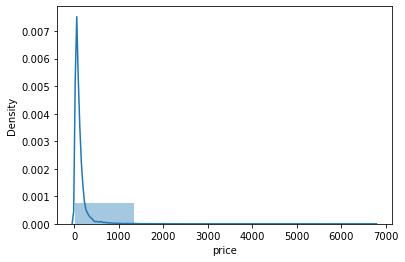

In [95]:
sns.distplot(df['price'], bins=5) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [96]:
df['price'].mean() # Check the mean

119.91109572007966

In [97]:
df['price'].median() # Check the median

74.9

In [98]:
df['price'].max() # Check the max

6735.0

### 3. Data prep for regression analysis 

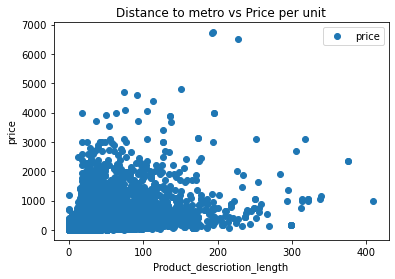

In [99]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'freight_value', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to metro vs Price per unit')  
plt.xlabel('Product_descriotion_length')  
plt.ylabel('price')  
plt.show()

In [100]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['freight_value'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [101]:
X

array([[13.29],
       [19.93],
       [17.87],
       ...,
       [16.95],
       [ 8.72],
       [12.79]])

In [102]:
y

array([[ 58.9 ],
       [239.9 ],
       [199.  ],
       ...,
       [ 99.9 ],
       [ 55.99],
       [ 43.  ]])

In [103]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [104]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [105]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [106]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

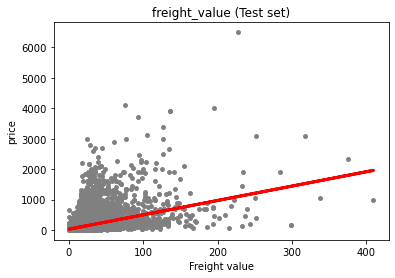

In [107]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('freight_value (Test set)')
plot_test.xlabel('Freight value')
plot_test.ylabel('price')
plot_test.show()

In [108]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [109]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.71689054]]
Mean squared error:  27279.472047727704
R2 score:  0.18252458893067414


In [110]:
y_predicted

array([[ 77.22237982],
       [ 96.75030667],
       [146.41916408],
       ...,
       [ 77.22237982],
       [136.84387628],
       [135.33447131]])

In [111]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,45.00,77.222380
1,8.90,96.750307
2,25.90,146.419164
3,116.60,112.929241
4,119.99,99.674779
5,19.90,60.383081
6,169.96,176.135575
7,20.00,92.033416
8,99.00,107.740662
9,75.00,151.041717


##### Compare how the regression fits the training set

In [112]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [113]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [114]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.71689054]]
Mean squared error:  27798.808756998125
R2 score:  0.16687968580586865


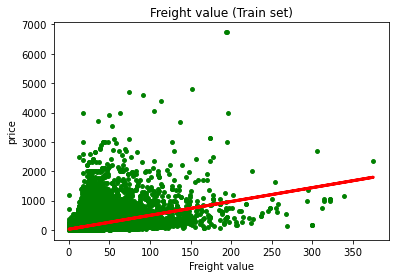

In [115]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Freight value (Train set)')
plot_test.xlabel('Freight value')
plot_test.ylabel('price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [116]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=1000] 

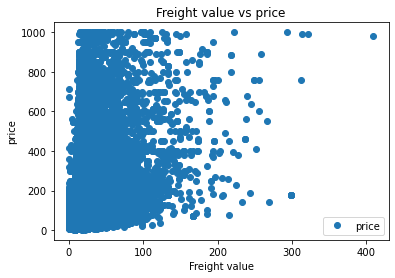

In [117]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'freight_value', y='price', style='o')  
plt.title('Freight value vs price')  
plt.xlabel('Freight value')  
plt.ylabel('price')  
plt.show()

In [118]:
# Reshape again.

X_2 = df_test['freight_value'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [119]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [120]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [121]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [122]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [123]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.173516]]
Mean squared error:  11637.618747317438
R2 score:  0.16743366466637422


In [124]:
#Comment: very weak correlation o 16,7%

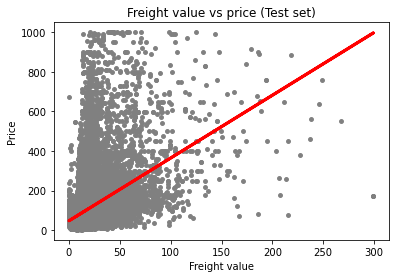

In [129]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Freight value vs price (Test set)')
plot_test.xlabel('Freight value')
plot_test.ylabel('Price')
plot_test.show()

In [126]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,18.30,71.744134
1,89.90,229.213998
2,19.99,70.538198
3,144.50,104.494820
4,9.00,91.800756
5,79.00,103.542765
6,308.99,103.923587
7,69.99,102.844591
8,324.99,106.430664
9,174.33,116.935002


In [127]:
#conclusion: it seems that prediction looks much different than tests on training data. Mostly is due to weak R2 relation of freight value to price.